# Bagging

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot
%matplotlib inline
import pandas as pd

In [3]:
df = sns.load_dataset("titanic")

In [4]:
df.shape

(891, 15)

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.dropna(inplace=True)

In [7]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


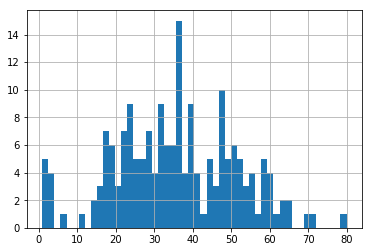

In [8]:
df['age'].hist(bins=50)

## Data Pre-processing

In [9]:
X = df[['pclass','sex','age']]

In [10]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [11]:
X['sex'] = lb.fit_transform(X['sex'])

/Users/Shared/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
X.head()

,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [13]:
X.shape

(182, 3)

In [14]:
X.describe()

,pclass,sex,age
count,182.000000,182.000000,182.000000
mean,1.192308,0.516484,35.623187
std,0.516411,0.501107,15.671615
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.750000
max,3.000000,1.000000,80.000000


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 3 columns):
pclass    182 non-null int64
sex       182 non-null int64
age       182 non-null float64
dtypes: float64(1), int64(2)
memory usage: 5.7 KB


In [16]:
y=df['survived']

In [17]:
y.value_counts()

1    123
0     59
Name: survived, dtype: int64

## Fit Model

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [20]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
def print_training_score(clf, X, y):
    print("Training Result:\n")
    print("Accuracy: {0:.4f}\n".format(accuracy_score(y, clf.predict(X))))
    print("Classification Report: \n {} \n".format(classification_report(y, clf.predict(X))))
    print("Confusion Matrix: \n {} \n".format(confusion_matrix(y, clf.predict(X))))

    res = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

In [23]:
def print_test_score(clf, X, y):
    print("Test Result:\n")

    print("Accuracy: {0:.4f}\n".format(accuracy_score(y, clf.predict(X))))
    print("Classification Report: \n {} \n".format(classification_report(y, clf.predict(X))))
    print("Confusion Matrix: \n {} \n".format(confusion_matrix(y, clf.predict(X))))

## Decision Tree

In [22]:
clf = DecisionTreeClassifier(random_state=42)

In [23]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [24]:
print_training_score(clf, X, y)

Training Result:

Accuracy: 0.8846

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        59
           1       0.92      0.91      0.91       123

   micro avg       0.88      0.88      0.88       182
   macro avg       0.87      0.87      0.87       182
weighted avg       0.89      0.88      0.88       182
 

Confusion Matrix: 
 [[ 49  10]
 [ 11 112]] 

Average Accuracy: 	 0.7844
Accuracy SD: 		 0.0891


In [25]:
print_test_score(clf, X_test,y_test)

Test Result:

Accuracy: 0.7213

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.58      0.62        24
           1       0.75      0.81      0.78        37

   micro avg       0.72      0.72      0.72        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.72      0.72      0.72        61
 

Confusion Matrix: 
 [[14 10]
 [ 7 30]] 



## Bagging 

In [26]:
from sklearn.ensemble import BaggingClassifier

In [27]:
#bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000, bootstrap=False,n_jobs=-1,random_state=42)

In [28]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000, bootstrap=True,n_jobs=-1,random_state=42)

In [29]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [30]:
print_training_score(bag_clf, X_train, y_train)

Training Result:

Accuracy: 0.9669

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        35
           1       0.98      0.98      0.98        86

   micro avg       0.97      0.97      0.97       121
   macro avg       0.96      0.96      0.96       121
weighted avg       0.97      0.97      0.97       121
 

Confusion Matrix: 
 [[33  2]
 [ 2 84]] 

Average Accuracy: 	 0.8044
Accuracy SD: 		 0.1360


In [31]:
print_test_score(bag_clf, X_test, y_test)

Test Result:

Accuracy: 0.7541

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.58      0.65        24
           1       0.76      0.86      0.81        37

   micro avg       0.75      0.75      0.75        61
   macro avg       0.75      0.72      0.73        61
weighted avg       0.75      0.75      0.75        61
 

Confusion Matrix: 
 [[14 10]
 [ 5 32]] 



# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_clf = RandomForestClassifier(random_state=42)

In [34]:
rf_clf.fit(X_train, y_train)

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [35]:
print_training_score(rf_clf, X_train, y_train)

Training Result:

Accuracy: 0.9587

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        35
           1       0.98      0.97      0.97        86

   micro avg       0.96      0.96      0.96       121
   macro avg       0.95      0.95      0.95       121
weighted avg       0.96      0.96      0.96       121
 

Confusion Matrix: 
 [[33  2]
 [ 3 83]] 

Average Accuracy: 	 0.7556
Accuracy SD: 		 0.1411


In [36]:
print_test_score(rf_clf, X_test, y_test)

Test Result:

Accuracy: 0.7541

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.62      0.67        24
           1       0.78      0.84      0.81        37

   micro avg       0.75      0.75      0.75        61
   macro avg       0.74      0.73      0.74        61
weighted avg       0.75      0.75      0.75        61
 

Confusion Matrix: 
 [[15  9]
 [ 6 31]] 



## Grid Search

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [38]:
params_grid = {"max_depth": [3,None],
              "min_samples_split": [2,3,10],
               "min_samples_leaf": [1,3,10],
               "bootstrap": [True, False],
               "criterion": ['gini', 'entropy']
              }

In [39]:
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs=-1, cv=5, verbose=1, scoring='accuracy')

In [40]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.7s finished
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, None], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [41]:
grid_search.best_score_

0.8347107438016529

In [42]:
grid_search.best_estimator_.get_params()

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [43]:
print_training_score(grid_search, X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Training Result:

Accuracy: 0.9669

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        35
           1       1.00      0.95      0.98        86

   micro avg       0.97      0.97      0.97       121
   macro avg       0.95      0.98      0.96       121
weighted avg       0.97      0.97      0.97       121
 

Confusion Matrix: 
 [[35  0]
 [ 4 82]] 

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    2.8s finished
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    2.4s finished
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.6s finished
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.2s finished
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.3s finished
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.1s finished
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    2.9s finished
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.1s finished
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    2.8s finished
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Average Accuracy: 	 0.7716
Accuracy SD: 		 0.1013


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    2.5s finished
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [44]:
print_test_score(grid_search, X_test,y_test)

Test Result:

Accuracy: 0.7377

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.62      0.65        24
           1       0.77      0.81      0.79        37

   micro avg       0.74      0.74      0.74        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.74      0.74        61
 

Confusion Matrix: 
 [[15  9]
 [ 7 30]] 



# Extremele Randomize Trees

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

In [46]:
xt_clf = ExtraTreesClassifier(random_state=42)

In [47]:
xt_clf.fit(X_train, y_train)

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [48]:
print_training_score(xt_clf, X_train, y_train)
print_test_score(xt_clf, X_test,y_test)

Training Result:

Accuracy: 0.9669

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        35
           1       1.00      0.95      0.98        86

   micro avg       0.97      0.97      0.97       121
   macro avg       0.95      0.98      0.96       121
weighted avg       0.97      0.97      0.97       121
 

Confusion Matrix: 
 [[35  0]
 [ 4 82]] 

Average Accuracy: 	 0.7981
Accuracy SD: 		 0.1023
Test Result:

Accuracy: 0.7541

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.62      0.67        24
           1       0.78      0.84      0.81        37

   micro avg       0.75      0.75      0.75        61
   macro avg       0.74      0.73      0.74        61
weighted avg       0.75      0.75      0.75        61
 

Confusion Matrix: 
 [[15  9]
 [ 6 31]] 



# AdaBoost

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [50]:
from sklearn.ensemble import AdaBoostClassifier

In [51]:
ada_clf = AdaBoostClassifier()

In [52]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [53]:
print_training_score(ada_clf , X_train, y_train)

Training Result:

Accuracy: 0.8583

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.84      0.81        45
           1       0.91      0.87      0.89        82

   micro avg       0.86      0.86      0.86       127
   macro avg       0.84      0.86      0.85       127
weighted avg       0.86      0.86      0.86       127
 

Confusion Matrix: 
 [[38  7]
 [11 71]] 

Average Accuracy: 	 0.7498
Accuracy SD: 		 0.1121


In [54]:
print_test_score(ada_clf, X_test, y_test)

Test Result:

Accuracy: 0.7273

Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.57      0.52        14
           1       0.84      0.78      0.81        41

   micro avg       0.73      0.73      0.73        55
   macro avg       0.66      0.68      0.66        55
weighted avg       0.75      0.73      0.74        55
 

Confusion Matrix: 
 [[ 8  6]
 [ 9 32]] 



## AdaBoost with Random Forest

In [56]:
ada_clf=AdaBoostClassifier(RandomForestClassifier(bootstrap=False,
 criterion="entropy",
 min_samples_leaf=1,
 min_samples_split=2,
 n_estimators=10,
 n_jobs=-1,
 oob_score=False,
 random_state= 42
 ))

In [57]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [63]:
print_training_score(ada_clf, X_train, y_train)
print_test_score(ada_clf, X_test,y_test)

Training Result:

Accuracy: 0.9370

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.91        45
           1       0.97      0.93      0.95        82

   micro avg       0.94      0.94      0.94       127
   macro avg       0.93      0.94      0.93       127
weighted avg       0.94      0.94      0.94       127
 

Confusion Matrix: 
 [[43  2]
 [ 6 76]] 



KeyboardInterrupt: 

In [ ]:
# Gradient Boost

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
gb_clf=GradientBoostingClassifier()

In [62]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [64]:
print_training_score(gb_clf, X_train, y_train)
print_test_score(gb_clf, X_test,y_test)

Training Result:

Accuracy: 0.9370

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        45
           1       0.95      0.95      0.95        82

   micro avg       0.94      0.94      0.94       127
   macro avg       0.93      0.93      0.93       127
weighted avg       0.94      0.94      0.94       127
 

Confusion Matrix: 
 [[41  4]
 [ 4 78]] 

Average Accuracy: 	 0.7647
Accuracy SD: 		 0.1117
Test Result:

Accuracy: 0.8364

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.88      0.90      0.89        41

   micro avg       0.84      0.84      0.84        55
   macro avg       0.79      0.77      0.78        55
weighted avg       0.83      0.84      0.83        55
 

Confusion Matrix: 
 [[ 9  5]
 [ 4 37]] 



# Extreme Gradient Boosting

In [1]:
import xgboost as xgb

In [24]:
xgb_clf = xgb.XGBClassifier(max_depth=1, n_estimators=5000, learning_rate=0.2)

In [27]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.2,
       max_delta_step=0, max_depth=1, min_child_weight=1, missing=None,
       n_estimators=5000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [28]:
print_training_score(xgb_clf, X_train, y_train)
print_test_score(xgb_clf, X_test,y_test)

Training Result:

Accuracy: 0.9008

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.93      0.93      0.93        86

   micro avg       0.90      0.90      0.90       121
   macro avg       0.88      0.88      0.88       121
weighted avg       0.90      0.90      0.90       121
 

Confusion Matrix: 
 [[29  6]
 [ 6 80]] 

Average Accuracy: 	 0.7415
Accuracy SD: 		 0.1186
Test Result:

Accuracy: 0.7541

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.62      0.67        24
           1       0.78      0.84      0.81        37

   micro avg       0.75      0.75      0.75        61
   macro avg       0.74      0.73      0.74        61
weighted avg       0.75      0.75      0.75        61
 

Confusion Matrix: 
 [[15  9]
 [ 6 31]] 

